dataset https://www.kaggle.com/datasets/dansbecker/urban-and-rural-photos/data

### Gerekli kütüphanelerin indirilmesi ve import edilmesi
# ---------------------------------------------------------------------------------------------------------------------

In [1]:
!pip install opencv-python --user

In [2]:
!pip install albumentations --user

In [133]:
import random
import cv2
from matplotlib import pyplot as plt
import albumentations as A
from PIL import Image
from IPython.display import display

In [134]:
rural_dir = "data/rural"
urban_dir = "data/urban"

### Bazı resimler jpeg uzantısı yerine jpg uzantılı olduğu için bir dönüştürme işlemi yapıyoruz.
# ---------------------------------------------------------------------------------------------------------------------

In [135]:
urban = glob.glob('data/urban/*.jpg')
print(urban)

['data/urban\\urban_29.jpg', 'data/urban\\urban_30.jpg', 'data/urban\\urban_37.jpg', 'data/urban\\urban_38.jpg', 'data/urban\\urban_44.jpg', 'data/urban\\urban_45.jpg']


In [136]:
rural = glob.glob('data/rural/*.jpg')
print(rural)

['data/rural\\rural15.jpg', 'data/rural\\rural19.jpg', 'data/rural\\rural21.jpg', 'data/rural\\rural38.jpg', 'data/rural\\rural40.jpg', 'data/rural\\rural42.jpg', 'data/rural\\rural43.jpg', 'data/rural\\rural44.jpg', 'data/rural\\rural9.jpg']


In [137]:
for i in range(len(urban)): 
    old_file = os.path.join(urban[i])
    new_file = os.path.join(urban[i].replace(".jpg",".jpeg"))
    os.rename(old_file, new_file)

In [138]:
for _ in range(len(rural)): 
    old_file = os.path.join(rural[_])
    new_file = os.path.join(rural[_].replace(".jpg",".jpeg"))
    os.rename(old_file, new_file)

### Örnek için her klasörden 5'er adet resim gösterdim.
# ---------------------------------------------------------------------------------------------------------------------

In [139]:
import os

dir_path = r'data/rural'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 46


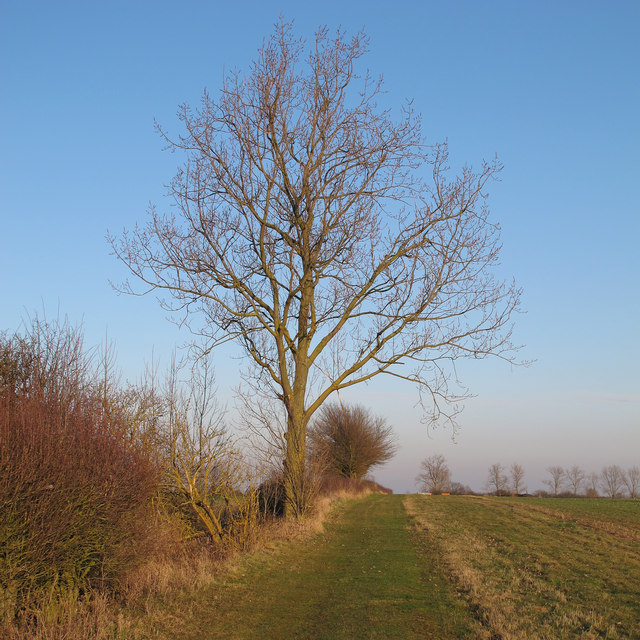

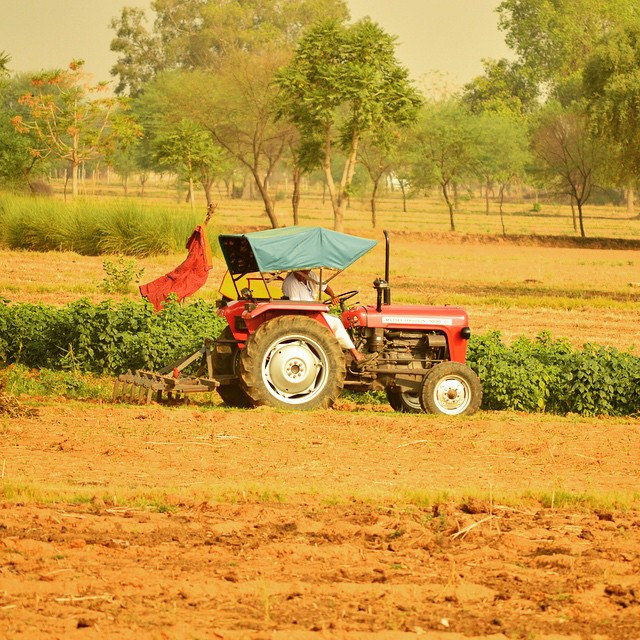

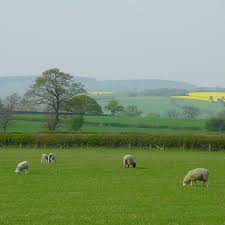

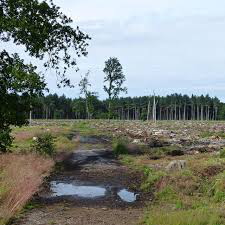

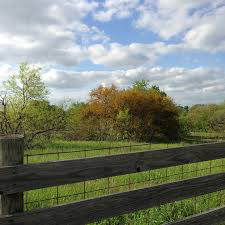

In [140]:
for i in range(5):
    folder_count = random.randint(0,count-1)
    img = Image.open(f"data/rural/rural{folder_count}.jpeg")
    display(img)

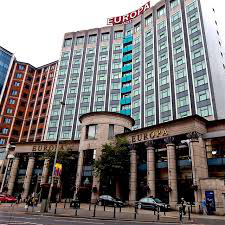

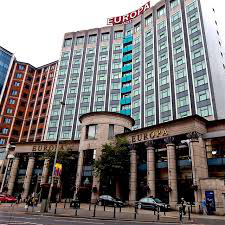

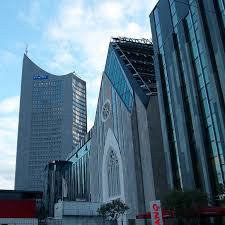

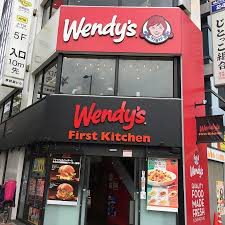

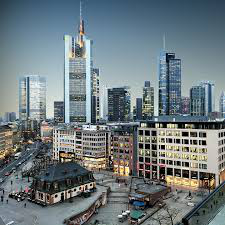

In [141]:
for i in range(5):
    folder_count = random.randint(0,count-1)
    img = Image.open(f"data/urban/urban_{folder_count}.jpeg")
    display(img)

# Augmentation
## Albumentation kütüphanesi ile bir pipeline hazırlayarak resimlerim 5 farklı versiyonunun oluşturulmasını sağladım
### Resimler döndürme , parlaklık değişikliği , ters çevirme gibi işlemler ile oluşturuluyor.

In [142]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=10, p=0.5),
    A.Resize(640, 480),
])

In [143]:
num_augmentations = 5

In [144]:
aug_rural_dir = "aug_images/rural"

if not os.path.exists(aug_rural_dir):
    os.makedirs(aug_rural_dir)
    
for img_name in os.listdir(rural_dir):
    img_path = os.path.join(rural_dir, img_name)
    image = cv2.imread(img_path)
    
    for i in range(num_augmentations):
                try:
                    augmented = transform(image=image)
                    aug_image = augmented['image']

                    aug_img_path = os.path.join(aug_rural_dir, f"{img_name.split('.')[0]}_aug_{i}.jpeg")
                    cv2.imwrite(aug_img_path, aug_image)
                    
                except Exception as e:
                    print(f"Augmentation sırasında hata oluştu: {e}")

In [145]:
aug_urban_dir = "aug_images/urban"

if not os.path.exists(aug_urban_dir):
    os.makedirs(aug_urban_dir)
    
for img_name in os.listdir(urban_dir):
    img_path = os.path.join(urban_dir, img_name)
    image = cv2.imread(img_path)
    
    for i in range(num_augmentations):
                try:
                    augmented = transform(image=image)
                    aug_image = augmented['image']

                    aug_img_path = os.path.join(aug_urban_dir, f"{img_name.split('.')[0]}_aug_{i}.jpeg")
                    cv2.imwrite(aug_img_path, aug_image)
                    
                except Exception as e:
                    print(f"Augmentation sırasında hata oluştu: {e}")